# Import necessary libraries

In [370]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix
import joblib

# Suppress warnings to avoid clutter

In [371]:
import warnings
warnings.filterwarnings("ignore")


# Load the Iris dataset

In [372]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Display the first few rows of the dataset

In [373]:
# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


# Check for missing values in the dataset

In [374]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


# Check for duplicate rows in the dataset

In [375]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)

if duplicates > 0:
    print("\nDuplicate Rows:")
    print(df[df.duplicated()])


Number of Duplicate Rows: 1

Duplicate Rows:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
142                5.8               2.7                5.1               1.9   

     species  
142        2  


# Drop duplicate rows from the dataset

In [376]:
# Drop duplicates
df = df.drop_duplicates()
print("\nDuplicates removed. Dataset now has", len(df), "rows.")



Duplicates removed. Dataset now has 149 rows.


# Display summary statistics and general information about the dataset

In [377]:
# Summary statistics and dataset information
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         149.000000        149.000000         149.000000   
mean            5.843624          3.059732           3.748993   
std             0.830851          0.436342           1.767791   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.300000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        149.000000  149.000000  
mean           1.194631    0.993289  
std            0.762622    0.817847  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


# Check the distribution of target classes (species)

In [378]:
# Check the distribution of target classes
class_counts = df['species'].value_counts()
print("\nClass Distribution:")
print(class_counts)



Class Distribution:
species
0    50
1    50
2    49
Name: count, dtype: int64


# Visualize the class distribution

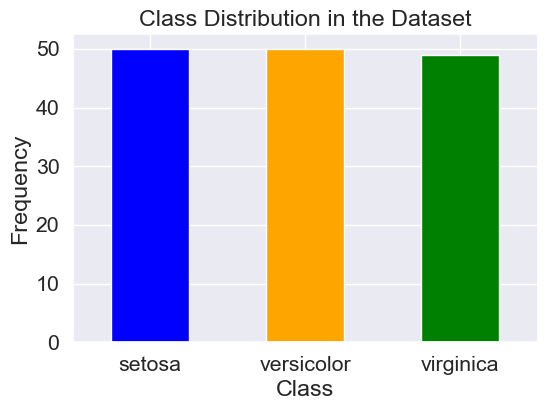

In [379]:
# Visualize the class distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Class Distribution in the Dataset')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(class_counts)), labels=iris.target_names, rotation=0)
plt.show()

# Visualize various features using boxplots

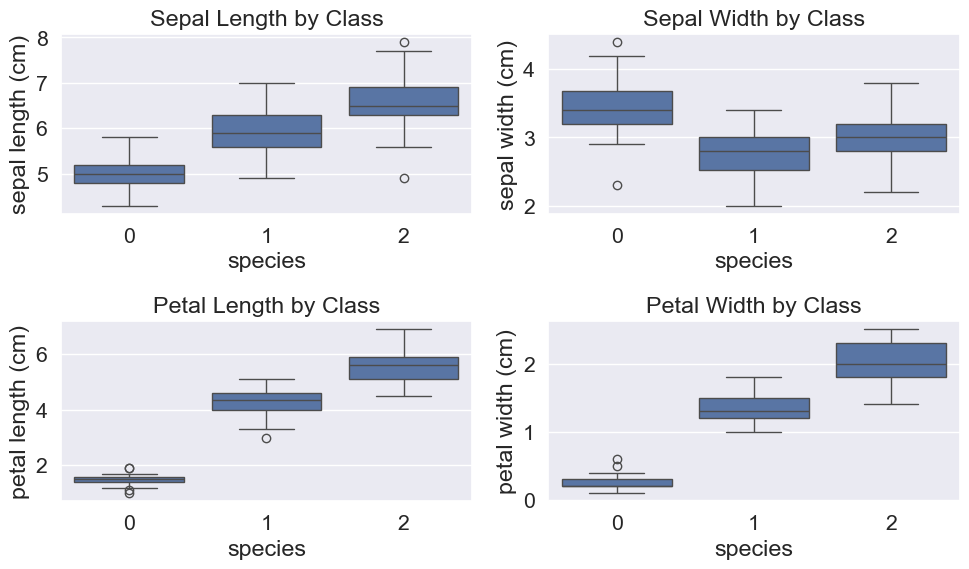

In [380]:
# Set the figure size for the subplots
plt.figure(figsize=(10, 6))

# Boxplot for Sepal Length by Species
plt.subplot(2, 2, 1)  # First subplot (2 rows, 2 columns, 1st plot)
sns.boxplot(x='species', y='sepal length (cm)', data=df)  # Boxplot for sepal length grouped by species
plt.title('Sepal Length by Class')  # Title of the plot

# Boxplot for Sepal Width by Species
plt.subplot(2, 2, 2)  # Second subplot (2 rows, 2 columns, 2nd plot)
sns.boxplot(x='species', y='sepal width (cm)', data=df)  # Boxplot for sepal width grouped by species
plt.title('Sepal Width by Class')  # Title of the plot

# Boxplot for Petal Length by Species
plt.subplot(2, 2, 3)  # Third subplot (2 rows, 2 columns, 3rd plot)
sns.boxplot(x='species', y='petal length (cm)', data=df)  # Boxplot for petal length grouped by species
plt.title('Petal Length by Class')  # Title of the plot

# Boxplot for Petal Width by Species
plt.subplot(2, 2, 4)  # Fourth subplot (2 rows, 2 columns, 4th plot)
sns.boxplot(x='species', y='petal width (cm)', data=df)  # Boxplot for petal width grouped by species
plt.title('Petal Width by Class')  # Title of the plot

# Adjust the layout to prevent overlap between subplots
plt.tight_layout()

# Display the plots
plt.show()


## Removing Outliers Using the IQR Method

In [381]:
# Assuming 'df' is the DataFrame containing the Iris dataset

# Calculate the IQR for each feature (sepal length, sepal width, petal length, petal width)
Q1 = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].quantile(0.25)
Q3 = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers by filtering rows where values are outside the IQR range
filtered_df = df[~((df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']] < (Q1 - 1.5 * IQR)) |
                   (df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the filtered DataFrame (without outliers)
print("Data without outliers:")
print(filtered_df)


Data without outliers:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

    

# Visualize feature distributions using histograms with KDE

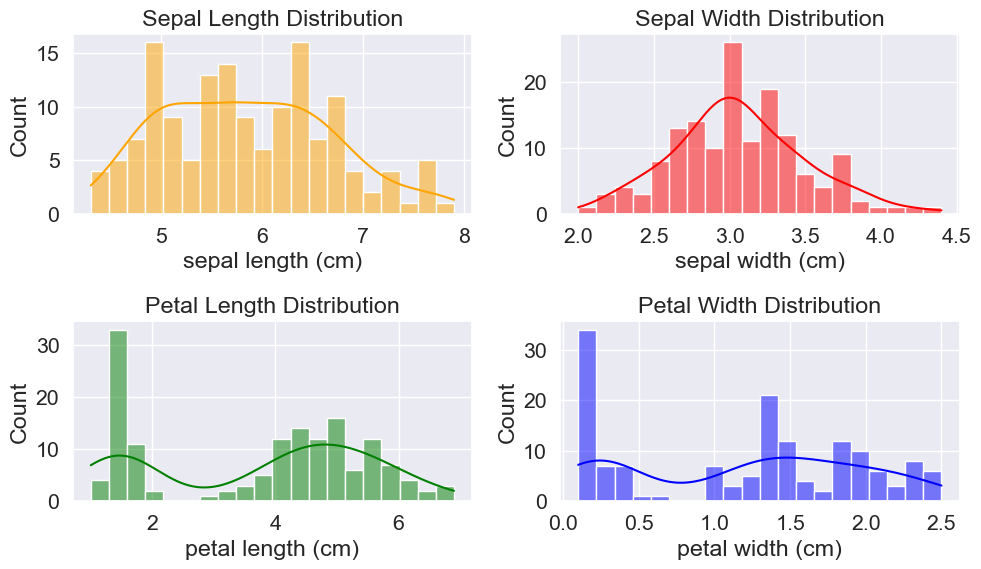

In [382]:
# Set the figure size for the subplots
plt.figure(figsize=(10, 6))

# Histogram for Sepal Length with KDE
plt.subplot(2, 2, 1)  # First subplot (2 rows, 2 columns, 1st plot)
sns.histplot(df['sepal length (cm)'], kde=True, bins=20, color='orange')  # Histogram with KDE
plt.title('Sepal Length Distribution')  # Title for the plot


plt.subplot(2, 2, 2)
sns.histplot(df['sepal width (cm)'], kde=True, bins=20, color='red')
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['petal length (cm)'], kde=True, bins=20, color='green')
plt.title('Petal Length Distribution')  # Title for the plot

plt.subplot(2, 2, 4)
sns.histplot(df['petal width (cm)'], kde=True, bins=20, color='blue')
plt.title('Petal Width Distribution')  # Title for the plot

plt.tight_layout()

# Display the plots
plt.show()


# Pairplot to visualize relationships between features by species

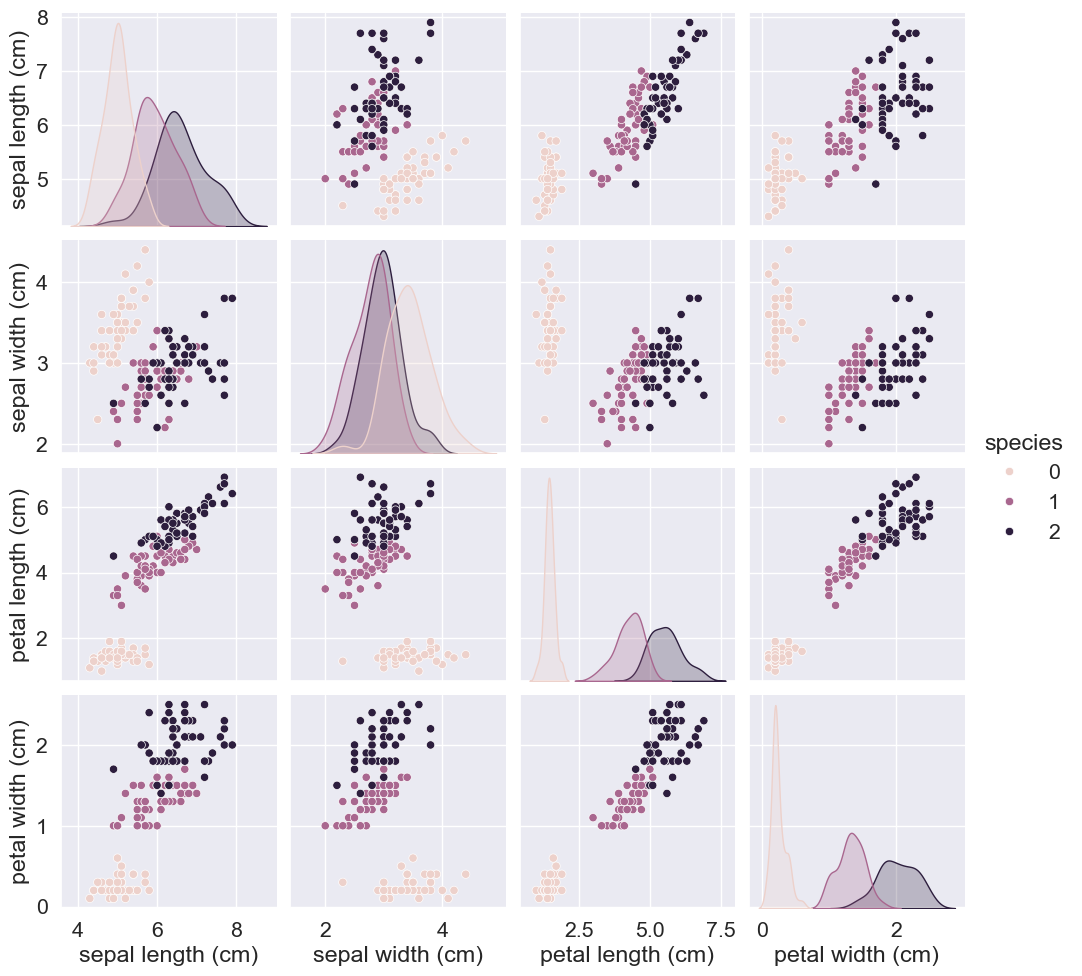

In [383]:
sns.pairplot(df, hue='species', diag_kind='kde')
plt.show()

# Compute and visualize the correlation matrix

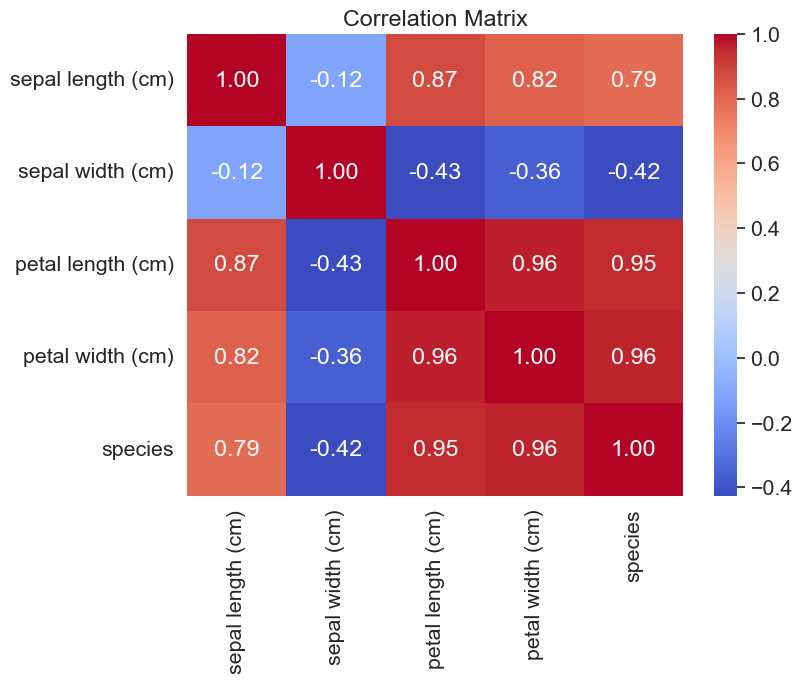

In [384]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# Split the data into features (X) and target (y)

In [385]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['species'])  # Features (drop target column)
y = df['species']  # Target column

# Split the data into training and testing sets (80% train, 20% test)

In [386]:
# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models for comparison

In [387]:
# Initialize models
rf_model = RandomForestClassifier()
svm_model = SVC()
lr_model = LogisticRegression()
gb_model = GradientBoostingClassifier()  # Gradient Boosting model

# List of models
models = [rf_model, svm_model, lr_model, gb_model]  # Added GradientBoostingClassifier

# Evaluate on both training and test sets
print("Training and Test Set Performance:")
for model in models:
    model.fit(x_train, y_train)
    train_accuracy = model.score(x_train, y_train)  # Training set accuracy
    test_accuracy = model.score(x_test, y_test)    # Test set accuracy
    print(f"{model.__class__.__name__}:")
    print(f"  Training Accuracy: {train_accuracy:.2f}")
    print(f"  Test Accuracy: {test_accuracy:.2f}")


Training and Test Set Performance:
RandomForestClassifier:
  Training Accuracy: 1.00
  Test Accuracy: 1.00
SVC:
  Training Accuracy: 0.97
  Test Accuracy: 1.00
LogisticRegression:
  Training Accuracy: 0.97
  Test Accuracy: 1.00
GradientBoostingClassifier:
  Training Accuracy: 1.00
  Test Accuracy: 1.00


# Cross-validation to estimate model performance

In [388]:
# Define the models you want to evaluate
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# List of models to evaluate
models = [rf_model, gb_model]

# Perform cross-validation for each model on the same dataset
for model in models:
    # Use cross-validation to estimate the performance
    cross_val_scores = cross_val_score(model, X, y, cv=5)  # X and y are the same dataset
    print(f"Cross-validation scores for {model.__class__.__name__}: {cross_val_scores}")
    print(f"Mean Cross-validation Accuracy: {cross_val_scores.mean():.2f}")


Cross-validation scores for RandomForestClassifier: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean Cross-validation Accuracy: 0.96
Cross-validation scores for GradientBoostingClassifier: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean Cross-validation Accuracy: 0.95


# Why Random Forest Was Chosen Based on Cross-Validation Results

Cross-validation is a reliable technique to evaluate the performance of a machine learning model by testing it on multiple splits of the data. Here's why Random Forest was chosen based on the cross-validation results:

###  **High Mean Accuracy**
The Random Forest model demonstrated a consistently high mean accuracy during cross-validation. This indicates that the model performs well across different subsets of the data and is not over-reliant on a specific portion of the dataset.

## Why Choose Random Forest as the Model?

Random Forest is a versatile and robust machine learning algorithm suitable for classification and regression tasks. Here are the key reasons why Random Forest was chosen for this project:

### 1. **High Accuracy**
Random Forest combines predictions from multiple decision trees to produce more accurate and stable results. By averaging or majority voting, it reduces the risk of overfitting compared to individual decision trees.

### 2. **Handles Overfitting**
Overfitting is a common issue in machine learning where the model performs well on the training data but poorly on unseen data. Random Forest mitigates this by aggregating results from multiple trees, each trained on a random subset of the data, making it less prone to overfitting.

### 3. **Feature Importance**
Random Forest provides an inherent measure of feature importance, helping to identify which features contribute most to the predictions. This insight can be valuable for understanding the dataset and improving the model.

### 4. **Parallelization and Scalability**
Random Forest trains multiple decision trees independently, making it highly parallelizable and scalable for larger datasets.


# Feature scaling using StandardScaler

In [389]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data to scale the features
x_train_scaled = scaler.fit_transform(x_train)

## Initializing and Training the RandomForest Model

In [390]:
# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier()

# Train the RandomForest model on the training data
rf_model.fit(x_train, y_train)

RandomForestClassifier()

## Model Evaluation

In [391]:
# Evaluate the model on the training and test sets
train_accuracy = rf_model.score(x_train, y_train)
test_accuracy = rf_model.score(x_test, y_test)

print(f"RandomForestClassifier Performance:")
print(f"  Training Accuracy: {train_accuracy:.2f}")
print(f"  Test Accuracy: {test_accuracy:.2f}")

RandomForestClassifier Performance:
  Training Accuracy: 1.00
  Test Accuracy: 1.00


# Display feature importance from the RandomForest model

In [392]:
# Get feature importance from the trained RandomForest model
importances = rf_model.feature_importances_

# Create a DataFrame to display the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print("\nFeature Importance:")
print(feature_importance_df)



Feature Importance:
             Feature  Importance
2  petal length (cm)    0.481804
3   petal width (cm)    0.378657
0  sepal length (cm)    0.105154
1   sepal width (cm)    0.034385


# Hyperparameter tuning using GridSearchCV

In [393]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)
print(f"Best Cross-validation Score: {grid_search.best_score_:.2f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters from GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation Score: 0.96


# Evaluate the model with confusion matrix and classification report

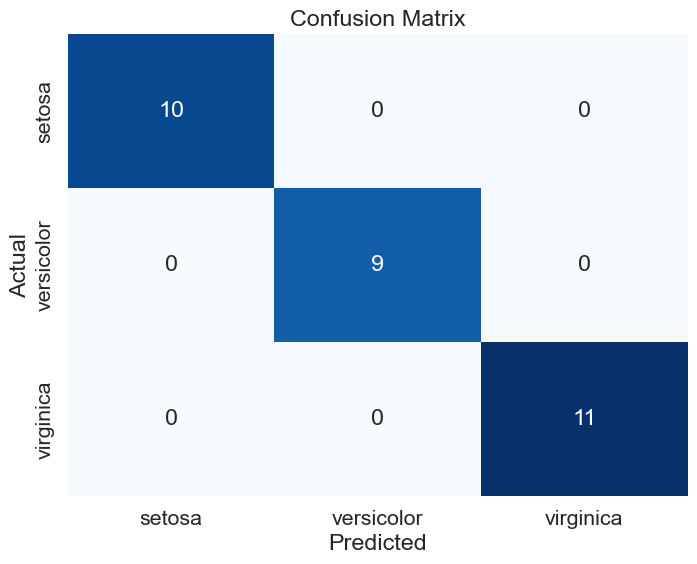

In [394]:
# Generate predictions on the test set
y_pred = rf_model.predict(x_test)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [395]:
from sklearn.metrics import classification_report

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))



Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Save the trained RandomForest model to a file

In [396]:
# Save the trained RandomForest model to a file
joblib.dump(rf_model, 'random_forest_model.joblib')

print("Model saved successfully as 'random_forest_model.joblib'.")

Model saved successfully as 'random_forest_model.joblib'.


# Load the saved model and make predictions

In [397]:
# Load the saved model
loaded_model = joblib.load('random_forest_model.joblib')

# Use the loaded model to make predictions or evaluate it
y_pred_loaded = loaded_model.predict(x_test)
print("Predictions with loaded model:", y_pred_loaded)

Predictions with loaded model: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
